In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import datasets

%matplotlib inline
plt.style.use('seaborn')
cmap = 'tab10'

In [2]:
df = pd.read_csv('vgsales-12-4-2019.csv')

### EDA

In [3]:
df

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg
5,6,Pokemon Red / Green / Blue Version,pokmon-red,Role-Playing,E,GB,Nintendo,Game Freak,NaN,9.4,NaN,31.38,NaN,NaN,NaN,NaN,NaN,1998.0,NaN,http://www.vgchartz.com/game/4030/pokemon-red-...,1,NaN,/games/boxart/full_6442337AmericaFrontccc.png
6,7,New Super Mario Bros.,new-super-mario-bros,Platform,E,DS,Nintendo,Nintendo EAD,NaN,9.1,8.1,30.80,NaN,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/1582/new-super-ma...,1,NaN,/games/boxart/full_2916260AmericaFrontccc.jpg
7,8,Tetris,tetris,Puzzle,E,GB,Nintendo,Bullet Proof Software,NaN,NaN,NaN,30.26,NaN,NaN,NaN,NaN,NaN,1989.0,NaN,http://www.vgchartz.com/game/4534/tetris/?regi...,1,NaN,/games/boxart/3740960ccc.jpg
8,9,New Super Mario Bros. Wii,new-super-mario-bros-wii,Platform,E,Wii,Nintendo,Nintendo EAD,NaN,8.6,9.2,30.22,NaN,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/35076/new-super-m...,1,9.1,/games/boxart/full_1410872AmericaFrontccc.jpg
9,10,Minecraft,minecraft,Misc,NaN,PC,Mojang,Mojang AB,NaN,10.0,NaN,30.01,NaN,NaN,NaN,NaN,NaN,2010.0,05th Aug 18,http://www.vgchartz.com/game/47724/minecraft/?...,1,NaN,/games/boxart/full_minecraft_1AmericaFront.png


In [4]:
df['Critic_Score'].fillna(0, inplace = True)

In [5]:
df['User_Score'].fillna(0, inplace=True)

In [6]:
df.drop_duplicates(subset ="Name", 
                     keep = 'first', inplace = True) 

In [7]:
df = df.reset_index(drop=True)

In [8]:
df['BG_Sam_Score'] = ''

In [9]:
df = df.drop(columns=['basename', 'VGChartz_Score', 'Total_Shipped', 'Global_Sales', 'NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales', 'Last_Update', 'status', 'Vgchartzscore'])

In [10]:
for x in tqdm(range(len(df['Critic_Score']))):
    if df.loc[x, 'Critic_Score'] > 0:
        if df.loc[x, 'User_Score'] == 0:
            df.loc[x, 'BG_Sam_Score'] = df.loc[x, 'Critic_Score']
        elif df.loc[x, 'User_Score'] > 0:
            df.loc[x, 'BG_Sam_Score'] = (df.loc[x, 'Critic_Score']+df.loc[x, 'User_Score'])/2
    elif df.loc[x, 'Critic_Score'] == 0:
        if df.loc[x, 'User_Score'] == 0:
            df.loc[x, 'BG_Sam_Score'] = 0
        elif df.loc[x, 'User_Score'] > 0:
            df.loc[x, 'BG_Sam_Score'] = df.loc[x, 'User_Score']

In [11]:
df['BG_Sam_Score'].value_counts()

0.00    33067
8.00      225
7.00      210
7.50      161
8.30      132
7.90      123
8.50      122
8.20      112
6.00      110
8.10      107
8.40      104
9.00      104
7.60      103
7.80       98
7.30       95
7.40       92
8.60       91
6.50       91
7.70       90
8.70       90
6.80       86
7.20       83
8.80       81
6.60       73
6.90       69
6.70       67
7.10       65
6.30       59
5.00       56
6.40       55
        ...  
9.65        1
6.35        1
8.40        1
2.40        1
9.15        1
7.65        1
1.30        1
9.40        1
9.90        1
7.45        1
1.20        1
1.00        1
1.40        1
2.20        1
9.10        1
7.95        1
6.05        1
9.75        1
7.40        1
1.70        1
8.65        1
7.25        1
6.80        1
6.25        1
6.65        1
1.80        1
7.05        1
4.75        1
2.70        1
7.15        1
Name: BG_Sam_Score, Length: 137, dtype: int64

In [12]:
len(df)

37102

The rank column is a rank of overall sales, so I'm going to drop all of the other sales columns. This ranking will be used as a measure of popularity and so, the rank will be the order in which we output the recommended games. I will drop the VGChartz_Score column since that column has no values and the Last_Update column since that is not important information. We can probably also drop the basename column since it is redundant information. I dropped status because I don't know what that means. 

url and img_url could be used for output

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37102 entries, 0 to 37101
Data columns (total 13 columns):
Rank            37102 non-null int64
Name            37102 non-null object
Genre           37102 non-null object
ESRB_Rating     13523 non-null object
Platform        37102 non-null object
Publisher       37102 non-null object
Developer       37087 non-null object
Critic_Score    37102 non-null float64
User_Score      37102 non-null float64
Year            36561 non-null float64
url             37102 non-null object
img_url         37102 non-null object
BG_Sam_Score    37102 non-null object
dtypes: float64(3), int64(1), object(9)
memory usage: 3.7+ MB


For the rest of the missing data I am just going to fill the missing ESRB rating with the mode. The missing developer I will fill with the mode as well. I'm just going to drop the critic and user score since they are missing over 85%. The missing year I will fill with the mode. 

In [14]:
df['ESRB_Rating'] = df['ESRB_Rating'].fillna(df['ESRB_Rating'].mode()[0])

In [15]:
df['Developer'] = df['Developer'].fillna(df['Developer'].mode()[0])

In [16]:
df = df.drop(columns=['Critic_Score', 'User_Score'])

In [17]:
df['Year'] = df['Year'].fillna(df['Year'].mode()[0])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37102 entries, 0 to 37101
Data columns (total 11 columns):
Rank            37102 non-null int64
Name            37102 non-null object
Genre           37102 non-null object
ESRB_Rating     37102 non-null object
Platform        37102 non-null object
Publisher       37102 non-null object
Developer       37102 non-null object
Year            37102 non-null float64
url             37102 non-null object
img_url         37102 non-null object
BG_Sam_Score    37102 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 3.1+ MB


In [19]:
df = df[df.BG_Sam_Score != 0]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4035 entries, 0 to 37083
Data columns (total 11 columns):
Rank            4035 non-null int64
Name            4035 non-null object
Genre           4035 non-null object
ESRB_Rating     4035 non-null object
Platform        4035 non-null object
Publisher       4035 non-null object
Developer       4035 non-null object
Year            4035 non-null float64
url             4035 non-null object
img_url         4035 non-null object
BG_Sam_Score    4035 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 378.3+ KB


In [21]:
df.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Year,url,img_url,BG_Sam_Score
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,2006.0,http://www.vgchartz.com/game/2667/wii-sports/?...,/games/boxart/full_2258645AmericaFrontccc.jpg,7.7
1,2,Super Mario Bros.,Platform,E,NES,Nintendo,Nintendo EAD,1985.0,http://www.vgchartz.com/game/6455/super-mario-...,/games/boxart/8972270ccc.jpg,10
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,2008.0,http://www.vgchartz.com/game/6968/mario-kart-w...,/games/boxart/full_8932480AmericaFrontccc.jpg,8.65
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,2009.0,http://www.vgchartz.com/game/24656/wii-sports-...,/games/boxart/full_7295041AmericaFrontccc.jpg,8.4
5,6,Pokemon Red / Green / Blue Version,Role-Playing,E,GB,Nintendo,Game Freak,1998.0,http://www.vgchartz.com/game/4030/pokemon-red-...,/games/boxart/full_6442337AmericaFrontccc.png,9.4


In [22]:
df = df.drop(df[['url', 'img_url']], axis=1)

In [23]:
(df.Genre).value_counts()

Role-Playing        642
Action              554
Shooter             483
Platform            327
Sports              308
Strategy            299
Racing              255
Adventure           250
Puzzle              221
Misc                216
Fighting            212
Simulation          175
Action-Adventure     54
Music                15
Party                14
MMO                   8
Board Game            1
Visual Novel          1
Name: Genre, dtype: int64

In [24]:
df.columns

Index(['Rank', 'Name', 'Genre', 'ESRB_Rating', 'Platform', 'Publisher',
       'Developer', 'Year', 'BG_Sam_Score'],
      dtype='object')

In [25]:
dummy_genre = pd.get_dummies(df['Genre'])

In [26]:
dummy_esrb_rating = pd.get_dummies(df['ESRB_Rating'])

In [27]:
dummy_platform = pd.get_dummies(df['Platform'])

In [28]:
dummy_publisher = pd.get_dummies(df['Publisher'])

In [29]:
dummy_developer = pd.get_dummies(df['Developer'])

In [30]:
dummy_df = pd.concat([df, dummy_genre], axis=1)

In [31]:
len(dummy_df.columns)

27

In [32]:
dummy_df = pd.concat([dummy_df, dummy_esrb_rating], axis=1)

In [33]:
len(dummy_df.columns)

33

In [34]:
dummy_df = pd.concat([dummy_df, dummy_platform], axis=1)

In [35]:
len(dummy_df.columns)

67

In [36]:
dummy_df = pd.concat([dummy_df, dummy_developer], axis=1)

In [37]:
len(dummy_df.columns)

1463

In [38]:
dummy_df.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Year,BG_Sam_Score,Action,Action-Adventure,Adventure,Board Game,Fighting,MMO,Misc,Music,Party,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Visual Novel,E,E10,EC,M,RP,T,3DS,Amig,DC,DS,DSiW,GB,GBA,GBC,GC,GEN,N64,NES,NGage,NS,PC,PS,PS2,PS3,PS4,PSN,PSP,PSV,SAT,SCD,SNES,VC,WW,Wii,WiiU,X360,XB,XBL,XOne,iOS,.theprodukkt,10tacle Studios AG,11 bit studios,1C Company,1C: Maddox Games,1C:Ino-Co,1st Playable Productions,"2015, Inc.",2D Boy,2K Australia / 2K Boston,2K Czech,2K Marin,2K Sports,2XL Games,343 Industries,3909 LLC,3D Realms,3DO,3d6 Games,4HEAD Studios,4a-games,4mm Games / Terminal Reality,5TH Cell,7 Studios,800 North and Digital Ranch,8MonkeyLabs,8ing/Raizing,989 Sports,989 Studios,A.C.R.O.N.Y.M. Games Inc.,A2M,ACE Team,AMA Studios,AQ Interactive,AWE Games,Absolutist Ltd.,Abylight,Access Games,Acclaim,Acclaim Entertainment,Acclaim Studios Austin,Acclaim Studios Cheltenham,Acclaim Studios London,Accolade,Acquire,Action Forms Ltd.,Activision,Adrenalin Entertainment,Adrenalin Interactive,Adventure Planning Service,Agenda,AirPlay,Airtight Games,Aiya Studio,Akaoni Studio,Aki Corp,Aki Corp.,Aki Corporation,Aksys Games,Alcachofa Soft,Alfa System,Alientrap Games Inc,All Yes Good,Alpha Unit,AlphaDream Corporation,Altron,Amanita Design,Amaze Entertainment,Ambrella,Amusement Vision,Anarchy Enterprises,Anchor,Ancient,Angry Mob Games,Animedia,Ankama Studio,Appaloosa Interactive,Arc System Works,"Arcen Games, LLC",ArenaNet,Argonaut Games,Arika,Arkane Studios / Floodgate Entertainment / Kuju Entertainment,Arkedo Studio,Arrowhead Game Studios,Ars System Works,Art Corporation,ArtDink,ArtVostok,ArtePiazza,Artech Digital Entertainment,Artech Studios,Artematica Entertainment,Artex Software,Artifex Mundi,Artifex Mundi sp. z o.o.,Artificial Mind and Movement,Artoon,Arush Entertainment,Arzest,Ascaron Entertainment,Ascaron Entertainment GmbH,"Asmik Ace Entertainment, Inc",Asobo Studio,Asobo Studios,Astrum Nival,Atari,Atari Games,Atelier-Sai,Athletic Design AB,Atlus,Atlus Co.,Atlus Co. / Lancarse,Atomic Games,Atomic Planet Entertainment,Atypical Alchemists Associate,Auran Games,Avalanche Software,Avalanche Studios,Awesome Studios,Babylon Software,Backbone Emeryville,Backbone Entertainment,Backbone Entertainment / Harmonix Music Systems,Bandai,Bandai Namco,Bandai Namco Games,Bandai Namco Games / NOW Production,Banpresto,Barnhouse Effect,Beatnik Games,Beatshapers,Beenox,Behaviour Interactive Inc.,Behaviour Studios,Best Way,BestGameEver.com,Bethesda Game Studios,Bethesda Softworks,Big Bad Wolf,Big Bang,Big Blue Box,Big Blue Bubble,Big Blue Bubble Inc.,Big Fish Games,Big Huge Games,Big Park,Big Red Button,Big Red Software,Big Sandwich Games,Bigbig Studios,Bimboosoft,BioWare,BioWare / LucasArts,BioWare Corp.,BioWare Corporation,BioWare Edmonton,Bionic Games,Birthday,Bizarre Creations,Bizarre Creations Ltd.,Black Box,Black Hole Games,Black Isle Studios,Black Lion Studios,Black Ops Entertainment,Black Rock Studio,Blade Interactive,Blazing Forge Games,Blendo Games,Blitz Arcade,Blitz Games,Blizzard Entertainment,Blizzard North,Blue Byte,Blue Byte Software / Related Designs,Blue Byte Studio,Blue Castle Games,Blue Fang Games,Blue Omega Entertainment,Blue Tongue,Bluepoint Games,Boneloaf,Bongfish GmbH,Bonus Level Entertainment,Bonus Mobile Entertainment,Bootdisk Revolution,Borealys Games,Boss Game Studios,Bossa Studios,Bottoms Up,BreakAway Games,Breakfall,Bright Future,Bright Light Productions,Brightside Games,Brilliant Blue-G,Broken Rules,Brownie Brown,BudCat Creations,"Buddiez, Inc.",BugBear,Bugbear Entertainment,Bullet Proof Software,Bullfrog Productions,Bungie,Bungie Studios,Buried Signal,Buzz Monkey Software,CAProduction,CD Projekt Red Studio,CRI,Camelot Software Planning,Camouflaj,Capcom,Capcom / Dimps Corporation,Capcom Entertainment,Capcom Production Studio 1,Capcom Production Studio 1 / TOSE Software,Capcom Production Studio 3 / Flagship,Capcom Production Studio 4,"Capcom Pr

In [39]:
dummy_df = dummy_df.drop(dummy_df[['Name', 'Genre', 'ESRB_Rating', 'Platform', 'Publisher', 'Developer']], axis=1)

In [40]:
df.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Year,BG_Sam_Score
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,2006.0,7.7
1,2,Super Mario Bros.,Platform,E,NES,Nintendo,Nintendo EAD,1985.0,10
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,2008.0,8.65
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,2009.0,8.4
5,6,Pokemon Red / Green / Blue Version,Role-Playing,E,GB,Nintendo,Game Freak,1998.0,9.4


In [76]:
dummy_df.head()

,Rank,Year,BG_Sam_Score,Action,Action-Adventure,Adventure,Board Game,Fighting,MMO,Misc,Music,Party,...,id Software,id Software / Raven Software,imageepoch Inc.,iocaine studios,n-Space,radiangames,skip Ltd.,syn Sophia,thatgamecompany,tri-Ace,tri-Crescendo / Monolith Soft,zSlide
0,1,2006.0,7.7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1985.0,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
2,3,2008.0,8.65,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2009.0,8.4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
5,6,1998.0,9.4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0


In [89]:
bins = [0, 14764, 29528, 44292, 59056]
labels = [1,2,3,4]
dummy_df['rank_binned'] = pd.cut(df['Rank'], bins=bins, labels=labels)

        Rank                                          Name             Genre  \
0          1                                    Wii Sports            Sports   
1          2                             Super Mario Bros.          Platform   
2          3                                Mario Kart Wii            Racing   
4          5                             Wii Sports Resort            Sports   
5          6            Pokemon Red / Green / Blue Version      Role-Playing   
6          7                         New Super Mario Bros.          Platform   
8          9                     New Super Mario Bros. Wii          Platform   
9         10                                     Minecraft              Misc   
11        12                                      Wii Play              Misc   
12        13                            Kinect Adventures!             Party   
13        14                                    Nintendogs        Simulation   
14        15                            

In [91]:
bins = [1969, 1985, 2000, 2010, 2020]
labels = [1,2,3,4]
dummy_df['year_binned'] = pd.cut(df['Year'], bins=bins, labels=labels)

        Rank                                          Name             Genre  \
0          1                                    Wii Sports            Sports   
1          2                             Super Mario Bros.          Platform   
2          3                                Mario Kart Wii            Racing   
4          5                             Wii Sports Resort            Sports   
5          6            Pokemon Red / Green / Blue Version      Role-Playing   
6          7                         New Super Mario Bros.          Platform   
8          9                     New Super Mario Bros. Wii          Platform   
9         10                                     Minecraft              Misc   
11        12                                      Wii Play              Misc   
12        13                            Kinect Adventures!             Party   
13        14                                    Nintendogs        Simulation   
14        15                            

In [92]:
bins = [0, 5, 7.5, 8.5, 10]
labels = [1,2,3,4]
dummy_df['score_binned'] = pd.cut(df['BG_Sam_Score'], bins=bins, labels=labels)

In [99]:
dummy_df = dummy_df.drop(dummy_df[['Rank', 'Year']], axis=1)

### K-Modes for fun. 
#### Interesting Centroids

In [46]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [47]:
pip install --upgrade kmodes

Requirement already up-to-date: kmodes in /Users/flatironschool/anaconda3/lib/python3.7/site-packages (0.10.1)
Note: you may need to restart the kernel to use updated packages.


In [48]:
import numpy as np
from kmodes.kmodes import KModes

# random categorical data
data = df

km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(data)

# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 721, cost: 29560.0
Run 1, iteration: 2/100, moves: 1, cost: 29560.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 870, cost: 29413.0
Run 2, iteration: 2/100, moves: 163, cost: 29413.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1017, cost: 30152.0
Run 3, iteration: 2/100, moves: 129, cost: 30152.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 793, cost: 29371.0
Run 4, iteration: 2/100, moves: 120, cost: 29371.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 706, cost: 29810.0
Run 5, iteration: 2/100, moves: 0, cost: 29810.0
Best run was number 4
[['2' "'Splosion Man" 'Shooter' 'E' 'PC' 'Nintendo' 'Nintendo EAD'
  '2

In [49]:
km.cluster_centroids_

array([['2', "'Splosion Man", 'Shooter', 'E', 'PC', 'Nintendo',
        'Nintendo EAD', '2009.0', '7.0'],
       ['53', '.hack//G.U. Vol.2//Reminisce', 'Role-Playing', 'T', 'PC',
        'Capcom', 'Capcom', '2005.0', '8.0'],
       ['6', '1080: TenEighty Snowboarding', 'Sports', 'E', 'PS',
        'EA Sports', 'EA Canada', '1998.0', '8.0'],
       ['20', '300: March to Glory', 'Action', 'M', 'X360',
        'Electronic Arts', 'Ubisoft Montreal', '2011.0', '8.0']],
      dtype='<U32')

In [50]:
label_list = list(km.labels_)

In [51]:
label_list

[0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 3,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 0,
 3,
 3,
 0,
 0,
 3,
 1,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 3,
 0,
 1,
 2,
 2,
 0,
 3,
 3,
 1,
 0,
 3,
 0,
 1,
 0,
 1,
 0,
 3,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 3,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 2,
 0,
 3,
 0,
 0,
 3,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 3,
 0,
 2,
 0,
 2,
 3,
 0,
 3,
 1,
 1,
 0,
 0,
 0,
 2,
 0,
 3,
 1,
 3,
 0,
 3,
 2,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 3,
 0,
 0,
 0,
 3,
 0,
 3,
 3,
 0,
 0,
 1,
 1,
 3,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 3,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 3,
 0,
 3,
 2,
 0,
 1,
 2,
 2,
 3,
 3,
 0,
 0,
 1,
 1,
 1,
 3,
 0,
 2,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 1,
 1,
 2,
 1,
 3,
 1,
 3,
 0,
 3,
 0,
 0,
 0,
 0,
 2,
 3,
 1,
 1,
 0,
 2,
 0,
 0,
 3,
 0,
 1,
 2,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 3,
 0,
 0,
 3,
 3,
 2,
 1,
 1,
 0,
 3,
 2,
 0,


### Using normalized data for MCA in order to prepare for Plotting / KMeans Clustering

In [52]:
pip install mca

Note: you may need to restart the kernel to use updated packages.


In [53]:
import mca

np.set_printoptions(formatter={'float': '{: 0.4f}'.format})
pd.set_option('display.precision', 5)
pd.set_option('display.max_columns', 25)

In [102]:
dummy_df.head()

,BG_Sam_Score,Action,Action-Adventure,Adventure,Board Game,Fighting,MMO,Misc,Music,Party,Puzzle,Racing,...,iocaine studios,n-Space,radiangames,skip Ltd.,syn Sophia,thatgamecompany,tri-Ace,tri-Crescendo / Monolith Soft,zSlide,rank_binned,year_binned,score_binned
0,7.7,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,3,3
1,10,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,1,4
2,8.65,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1,3,4
4,8.4,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,3,3
5,9.4,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,2,4


In [104]:
mca_df = mca.MCA(dummy_df, ncols=3)

TypeError: Series cannot perform the operation /

In [120]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3) 
pca.fit(dummy_df) 
#let's check the shape of X_pca array
print("shape of X_train_pca", dummy_df.shape)

shape of X_train_pca (4035, 1457)


In [121]:
plot_df = pca.transform(dummy_df)

In [123]:
plot_df

array([[-0.6113, -0.4262,  0.4871],
       [-3.1167, -0.1701,  2.1337],
       [-1.9262, -0.3245,  0.5101],
       ...,
       [-1.1014,  2.6505, -0.7558],
       [-1.6844,  2.6971, -0.7116],
       [-2.0354,  2.6175, -0.7737]])

In [130]:
plot_df = pd.DataFrame(plot_df)

In [138]:
plot_df = plot_df.rename(index=str, columns={0: "first", 1: "second", 2: 'third'})

In [139]:
plot_df.head()

,first,second,third
0,-0.61126,-0.42617,0.48714
1,-3.11672,-0.17006,2.13374
2,-1.92618,-0.32447,0.51008
3,-1.21611,-0.38544,0.46857
4,-2.60331,-0.24561,1.24350


### K Means Clustering

### How many K's should we choose?

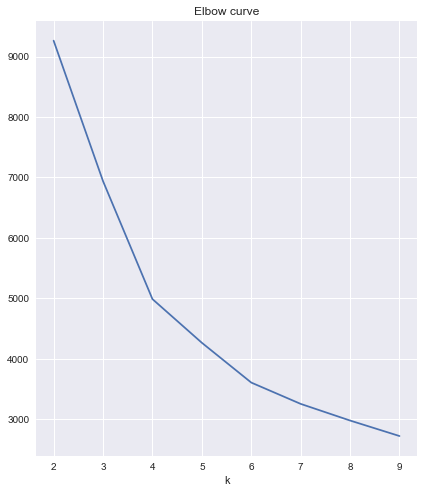

In [148]:
# Specifying the dataset and initializing variables
X = plot_df
distorsions = []

# Calculate SSE for different K
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state = 301)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

# Plot values of SSE
plt.figure(figsize=(15,8))
plt.subplot(121, title='Elbow curve')
plt.xlabel('k')
plt.plot(range(2, 10), distorsions)
plt.grid(True)


In [152]:
# Generate silhouette coefficient for each k
X = plot_df
silhouette_plot = []
for k in range(2, 10):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(X)
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    silhouette_plot.append(silhouette_avg)

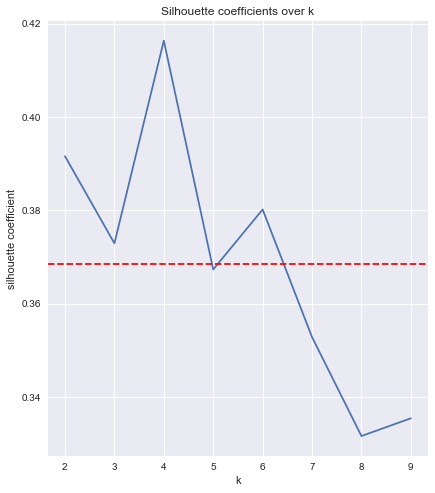

In [153]:
# Plot Silhouette coefficient
plt.figure(figsize=(15,8))
plt.subplot(121, title='Silhouette coefficients over k')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.plot(range(2, 10), silhouette_plot)
plt.axhline(y=np.mean(silhouette_plot), color="red", linestyle="--")
plt.grid(True)

### Looks like 6 clusters will give us the higher silhouette coefficient while minimizing the within cluster sum of squares (WSS)

In [154]:
# Required packages for today
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import datasets

# Familiar packages for plotting, data manipulation, and numeric functions
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Have plots appear in notebook
%matplotlib inline

# Default plot params
plt.style.use('seaborn')
cmap = 'tab10'

In [155]:
model = KMeans(n_clusters=6).fit(plot_df)

In [160]:
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [162]:
plot_df['cluster'] = model.labels_

### Plot a 3d Graph

In [126]:
from mpl_toolkits import mplot3d

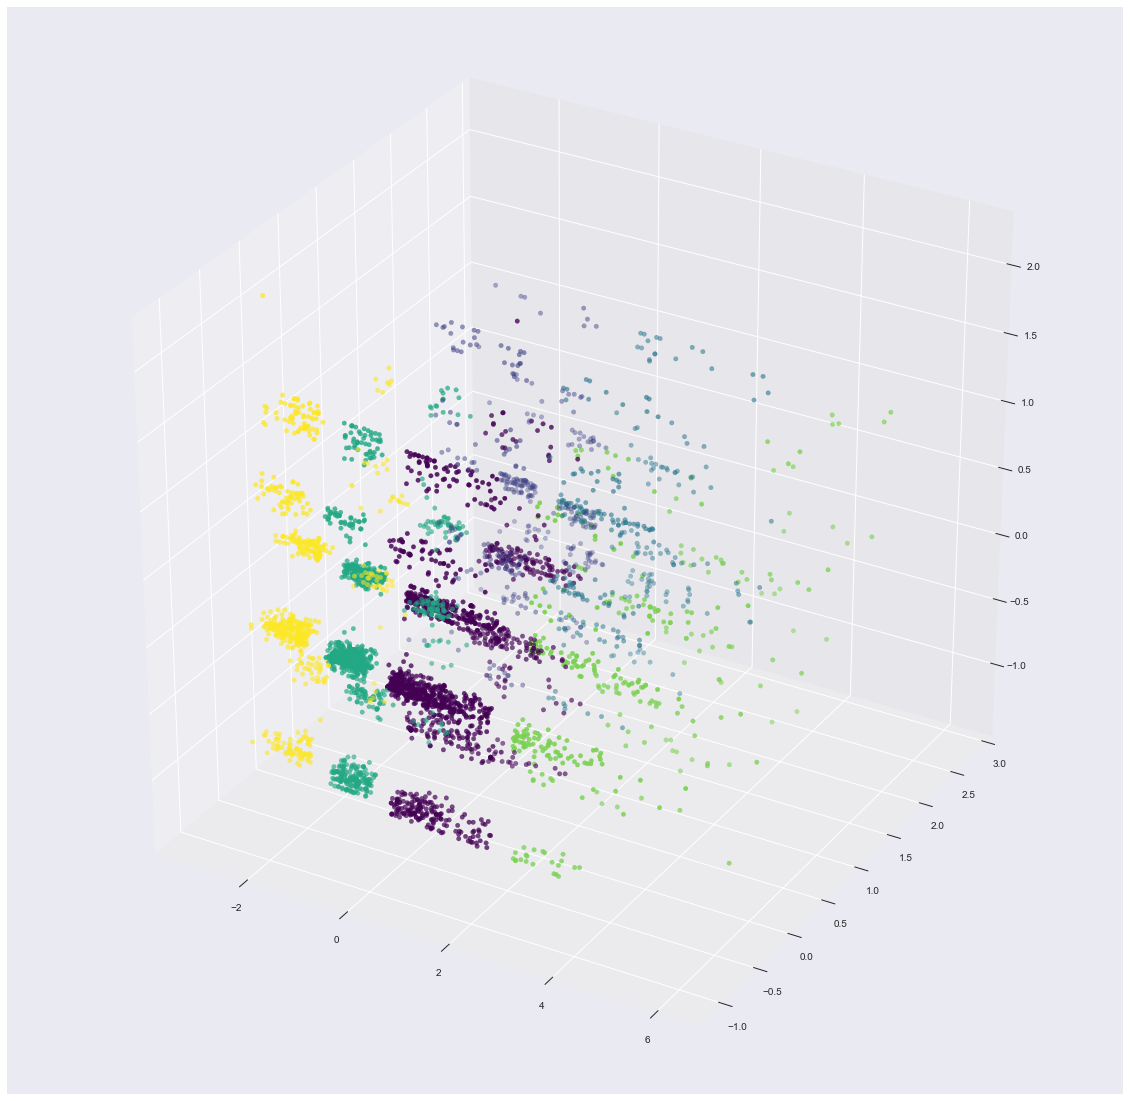

In [166]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')

x = np.array(plot_df['first'])
y = np.array(plot_df['second'])
z = np.array(plot_df['third'])

ax.scatter(x,y,z, c = plot_df['cluster'],s=20, cmap="viridis")

plt.show()